In [1]:
import pandas as pd
from feature_handling import FeatureHandling2 as FH
from splitter_sampler import SplitterSampler as SS
from dataframe_observer import DataframeObserver as DO
from modeling import Modeling
from evaluation import BinClsEvaluation

titanic = pd.read_csv('../data/titanic.csv')
DO.read_df_info(titanic)

------------------
846 rows, 12 columns.
------------------
               Dtype  Count  unique   unique%  missing  missing%
PassengerId    int64    846     846  1.000000        0  0.000000
Pclass         int64    846       3  0.003546        0  0.000000
Name          object    846     846  1.000000        0  0.000000
Sex           object    846       2  0.002364        0  0.000000
Age          float64    676      86  0.101655      170  0.200946
SibSp          int64    846       7  0.008274        0  0.000000
Parch          int64    846       7  0.008274        0  0.000000
Ticket        object    846     652  0.770686        0  0.000000
Fare         float64    846     243  0.287234        0  0.000000
Cabin         object    192     143  0.169031      654  0.773050
Embarked      object    844       3  0.003546        2  0.002364
Survived       int64    846       2  0.002364        0  0.000000
------------------


In [2]:
titanic = titanic[['Pclass','Sex','Fare','Age','SibSp',
                    'Parch','Embarked','Survived']]
DO.read_df_info(titanic)

------------------
846 rows, 8 columns.
------------------
            Dtype  Count  unique   unique%  missing  missing%
Pclass      int64    846       3  0.003546        0  0.000000
Sex        object    846       2  0.002364        0  0.000000
Fare      float64    846     243  0.287234        0  0.000000
Age       float64    676      86  0.101655      170  0.200946
SibSp       int64    846       7  0.008274        0  0.000000
Parch       int64    846       7  0.008274        0  0.000000
Embarked   object    844       3  0.003546        2  0.002364
Survived    int64    846       2  0.002364        0  0.000000
------------------


-------------------------------------
Type: int64
Rows: 846
Distinct: 2
Missing: 0
Missing%: 0.0
-------------------------------------
Top 2 values:
   Survived  Count         %     Cum.%
0         0    527  0.622931  0.622931
1         1    319  0.377069  1.000000
-------------------------------------


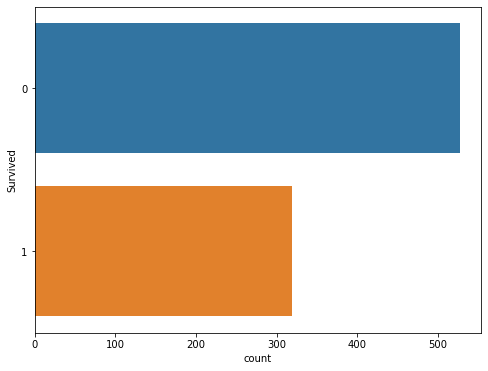

In [3]:
DO.describe_cat_col(titanic,'Survived')

In [4]:
train,test = SS.split_df(titanic)
train.shape, test.shape

((676, 8), (170, 8))

In [5]:
DO.read_df_info(train)

------------------
676 rows, 8 columns.
------------------
            Dtype  Count  unique   unique%  missing  missing%
Pclass      int64    676       3  0.004438        0  0.000000
Sex        object    676       2  0.002959        0  0.000000
Fare      float64    676     221  0.326923        0  0.000000
Age       float64    537      83  0.122781      139  0.205621
SibSp       int64    676       7  0.010355        0  0.000000
Parch       int64    676       6  0.008876        0  0.000000
Embarked   object    675       3  0.004438        1  0.001479
Survived    int64    676       2  0.002959        0  0.000000
------------------


-------------------------------------------------
['Age', 'Embarked']
0-0    536
1-0    139
0-1      1
dtype: int64


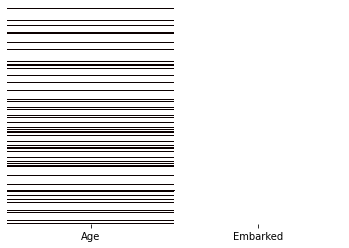

In [6]:
fh = FH(train, test)
DO.missing_pattern(train.drop(['Survived'],axis=1),only_missing_col=True)

In [7]:
fh.imputer('Age','median')
fh.imputer('Embarked','mode')
train_ed,test_ed=fh.general_encoder(['Fare','Age'],None,['Pclass','Sex','SibSp','Parch','Embarked'])

In [8]:
DO.read_df_info(train_ed)
DO.read_df_info(test_ed)

------------------
676 rows, 24 columns.
------------------
              Dtype  Count  unique   unique%  missing  missing%
Fare        float64    676     221  0.326923        0       0.0
Age         float64    676      83  0.122781        0       0.0
Pclass_1    float64    676       2  0.002959        0       0.0
Pclass_2    float64    676       2  0.002959        0       0.0
Pclass_3    float64    676       2  0.002959        0       0.0
Sex_female  float64    676       2  0.002959        0       0.0
Sex_male    float64    676       2  0.002959        0       0.0
SibSp_0     float64    676       2  0.002959        0       0.0
SibSp_1     float64    676       2  0.002959        0       0.0
SibSp_2     float64    676       2  0.002959        0       0.0
SibSp_3     float64    676       2  0.002959        0       0.0
SibSp_4     float64    676       2  0.002959        0       0.0
SibSp_5     float64    676       2  0.002959        0       0.0
SibSp_8     float64    676       2  0.002959

In [9]:
X_train, X_test, y_train, y_test= SS.split_train_test(train_ed,test_ed,'Survived')
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((676, 23), (170, 23), (676,), (170,))

In [10]:
print(X_train.columns.tolist())
print(X_test.columns.tolist())

['Fare', 'Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
['Fare', 'Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


In [11]:
md = Modeling(X_train, X_test, y_train, y_test, task='bin', metric='accuracy', random_state=1234, cv=0.2)
y_score, best_model, best_score, best_param = \
    md.modeling(
        model='rf',
        class_weight='balanced',
        hp={'max_depth': [3,5,7],
            'n_estimators': [100,200,400]
            },
        calibration='sigmoid'
    )

0:00:09.144165


In [12]:
bce = BinClsEvaluation(y_score,y_test)

/Users/FY/opt/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/FY/opt/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/FY/opt/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/FY/opt/anaconda3/envs/py36/lib/python3.6/site-packages

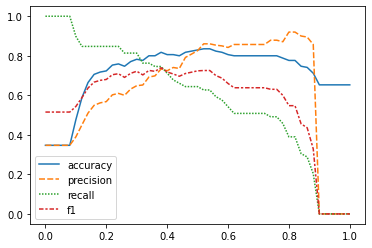

In [13]:
bce.decision_chart()

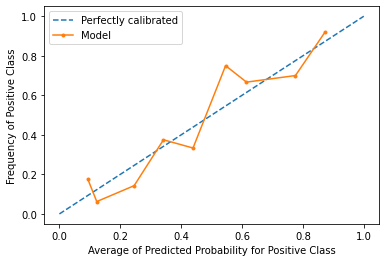

In [14]:
bce.calibration_curve()

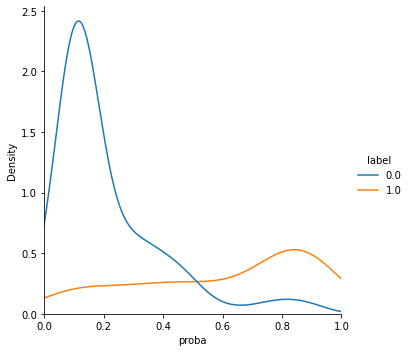

In [15]:
bce.density_chart()

0:00:03.774995


/Users/FY/opt/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


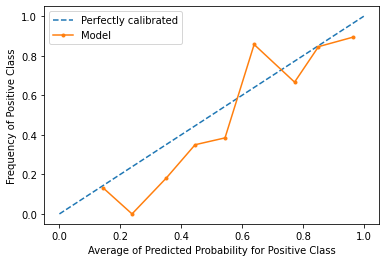

In [16]:
md = Modeling(X_train, X_test, y_train, y_test, task='bin', metric='accuracy', random_state=1234, cv=0.2)
y_score, best_model, best_score, best_param = \
    md.modeling(
        model='rf',
        class_weight='balanced',
        hp={'max_depth': [3,5,7],
            'n_estimators': [100,200,400]
            }
    )
bce = BinClsEvaluation(y_score,y_test)
bce.calibration_curve()

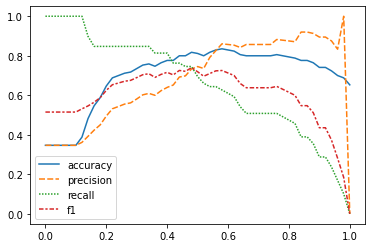

In [17]:
bce.decision_chart()


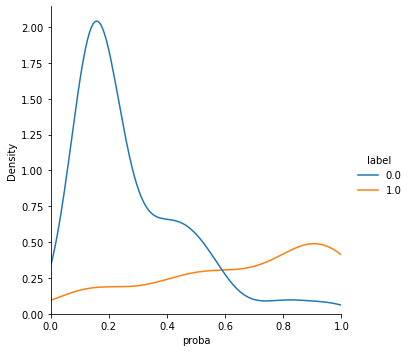

In [18]:
bce.density_chart()



Cutoff = 0.48
--------Confusion Matrix-----------
          Predicted_1  Predicted_0
Actual_1           95           16
Actual_0           15           44
-----------------------------------
           Predicted_1  Predicted_0
Actual_1%         0.86         0.14
Actual_0%         0.25         0.75
-----------------------------------
          Predicted_1%  Predicted_0%
Actual_1          0.86          0.27
Actual_0          0.14          0.73
-------------Cost Matrix-----------
If model predict 1 and value 1, the gain is 1 x 44 = 44
If model predict 1 and value 0, the gain is -0.3 x 16 = -4.8
If model predict 0 and value 1, the gain is 0 x 15 = 0
If model predict 0 and value 0, the gain is 0 x 95 = 0
Average gain per record 0.23 x 170 = 39.2
-----------------------------------


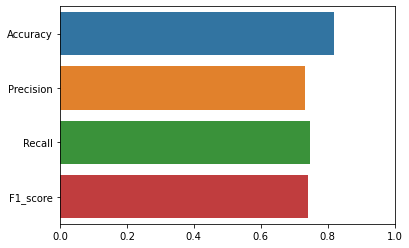

In [19]:
bce.confusion_matrix()

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_score>0.48)

In [21]:
record_count = pd.DataFrame(data=cm, columns=['Predicted_1', 'Predicted_0'], index=['Actually_0','Actually_1'])
print(record_count)

            Predicted_1  Predicted_0
Actually_0           95           16
Actually_1           15           44
